# HW2 - Chao Chen

## Question 1

### (a) Download Data

### (b)

In [1]:
import sys
import pandas as pd
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.metrics import confusion_matrix, precision_score, f1_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path ='./AReM/'
folders1 = ['bending1', 'bending2']
folders2 = ['cycling', 'lying', 'sitting', 'standing', 'walking']
test_dataset_list = []
# read test data
j=0
test_df = pd.DataFrame()
file_list = []
for f in folders1+folders2:
    for file in glob.glob(path + f + '/*.csv'):
        file_list.append(file)
for f in folders1:
    df1 = pd.read_csv(path + f + '/dataset1.csv', index_col=0, header=0, skiprows=4)
    df2 = pd.read_csv(path + f + '/dataset2.csv', index_col=0, header=0, skiprows=4)
    test_dataset_list.append(df1)
    test_dataset_list.append(df2)
    j += 2

for f in folders2:
    df1 = pd.read_csv(path + f + '/dataset1.csv', index_col=0, header=0, skiprows=4)
    df2 = pd.read_csv(path + f + '/dataset2.csv', index_col=0, header=0, skiprows=4)
    df3 = pd.read_csv(path + f + '/dataset3.csv', index_col=0, header=0, skiprows=4)
    test_dataset_list.append(df1)
    test_dataset_list.append(df2)
    test_dataset_list.append(df3)
    j+=3
test_df = pd.concat(test_dataset_list)

In [3]:
# read training data
training_dataset_list = []
# read test data
train_df = pd.DataFrame()
        
for f in folders1:
    for file in glob.glob(path + f + '/*.csv'):
        if file == path + f + "/dataset1.csv" or file == path + f + "/dataset2.csv":
            continue
        df = pd.read_csv(file, index_col=0, header=0, skiprows=4)
        training_dataset_list.append(df)
    
for f in folders2:
    for file in glob.glob(path + f + '/*.csv'):
        if file == path + f + "/dataset1.csv" or file == path + f + "/dataset2.csv" or file == path + f + "/dataset3.csv":
            continue
        df = pd.read_csv(file, index_col=0, header=0, skiprows=4)
        training_dataset_list.append(df)
    
train_df = pd.concat(training_dataset_list)

### (c)

**(i)** Mean, standard deviation, skewness, kurtosis, maximum, minimum, cross-correlation between each dimension, parameters of the AR/MA part, k-quantiles.

In [4]:
df = pd.read_csv(file, index_col=0, header=0, skiprows=4)

(ii)

In [5]:
all_list = []
names = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
for f in folders1 + folders2:
    for file in glob.glob(path + f + '/*.csv'):
        df = pd.read_csv(file, index_col=0, header=0, skiprows=4)
        lst = []
        for col in names:
            lst.append(df[col].min(axis=0))
            lst.append(df[col].max(axis=0))
            lst.append(df[col].mean(axis=0))
            lst.append(df[col].median(axis=0))
            lst.append(df[col].std(axis=0))
            lst.append(df[col].quantile(q=0.25))
            lst.append(df[col].quantile(q=0.75))
        all_list.append(lst)

**(iii)**

In [6]:
features_pd = pd.DataFrame(all_list)
cols = []
for i in range(1, 7):
    cols.append('min_' + str(i))
    cols.append('max_' + str(i))
    cols.append('mean_' + str(i))
    cols.append('median_' + str(i))
    cols.append('stdev_' + str(i))
    cols.append('1st quart_' + str(i))
    cols.append('3rd quart_' + str(i))
features_pd.columns = cols
features_pd.index = np.arange(1,len(features_pd)+1)
features_pd

,min_1,max_1,mean_1,median_1,stdev_1,1st quart_1,3rd quart_1,min_2,max_2,mean_2,...,stdev_5,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,stdev_6,1st quart_6,3rd quart_6
1,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.00,1.92,0.570583,0.430,0.582915,0.0000,1.3000
2,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.5000,0.00,3.11,0.571083,0.430,0.601010,0.0000,1.3000
3,35.00,47.40,43.954500,44.330,1.558835,43.0000,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.00,1.79,0.493292,0.430,0.513506,0.0000,0.9400
4,33.00,47.75,42.179813,43.500,3.670666,39.1500,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000
5,33.00,45.75,41.678063,41.750,2.243490,41.3300,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000
6,37.00,48.00,43.454958,43.250,1.386098,42.5000,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700
7,36.25,48.00,43.969125,44.500,1.618364,43.3100,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300
8,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,3.693786,20.5000,27.0000,0.00,4.97,0.700188,0.500,0.693720,0.4300,0.8700
9,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,5.053642,15.0000,20.7500,0.00,6.76,1.122125,0.830,1.012342,0.4700,1.3000
10,21.00,50.00,32.586208,33.000,6.238143,26.1875,34.5000,0.0,9.90,0.516125,...,5.032424,17.6700,23.5000,0.00,13.61,1.162042,0.830,1.332980,0.4700,1.3000


In [7]:
# estimate stdev
ci_list = []
for name in features_pd:
    feature_ci_pair = []
    feature = features_pd[name]
    feature_ci = bs.bootstrap(feature.values, stat_func=bs_stats.std)
    feature_ci_pair.append(feature_ci.value)
    feature_ci_pair.append((feature_ci.lower_bound, feature_ci.upper_bound))
    ci_list.append(feature_ci_pair)
index_name_pair = {}
i = 0
for col in cols:
    index_name_pair[i] = col
    i += 1
features_ci = pd.DataFrame(ci_list)
features_ci.rename(columns={0:'stdev',1:'confidence interval'},index=index_name_pair)

,stdev,confidence interval
min_1,9.515445,"(8.04364667294, 11.0255653019)"
max_1,4.369322,"(3.28023557057, 5.62092736021)"
mean_1,5.305314,"(4.65002911334, 6.03415322452)"
median_1,5.409056,"(4.74332533497, 6.16526499465)"
stdev_1,1.762056,"(1.54881221164, 1.99552287299)"
1st quart_1,6.118526,"(5.53698106034, 6.79673101052)"
3rd quart_1,5.109643,"(4.26389206229, 6.062172193)"
min_2,0.000000,"(0.0, 0.0)"
max_2,5.033882,"(4.62931672339, 5.54953643929)"
mean_2,1.565194,"(1.40972218078, 1.78168101599)"


**(iv)**
    Select min, mean, and max since the variance of those three compared to other features are relatively small. 

### (d)

**(i)**

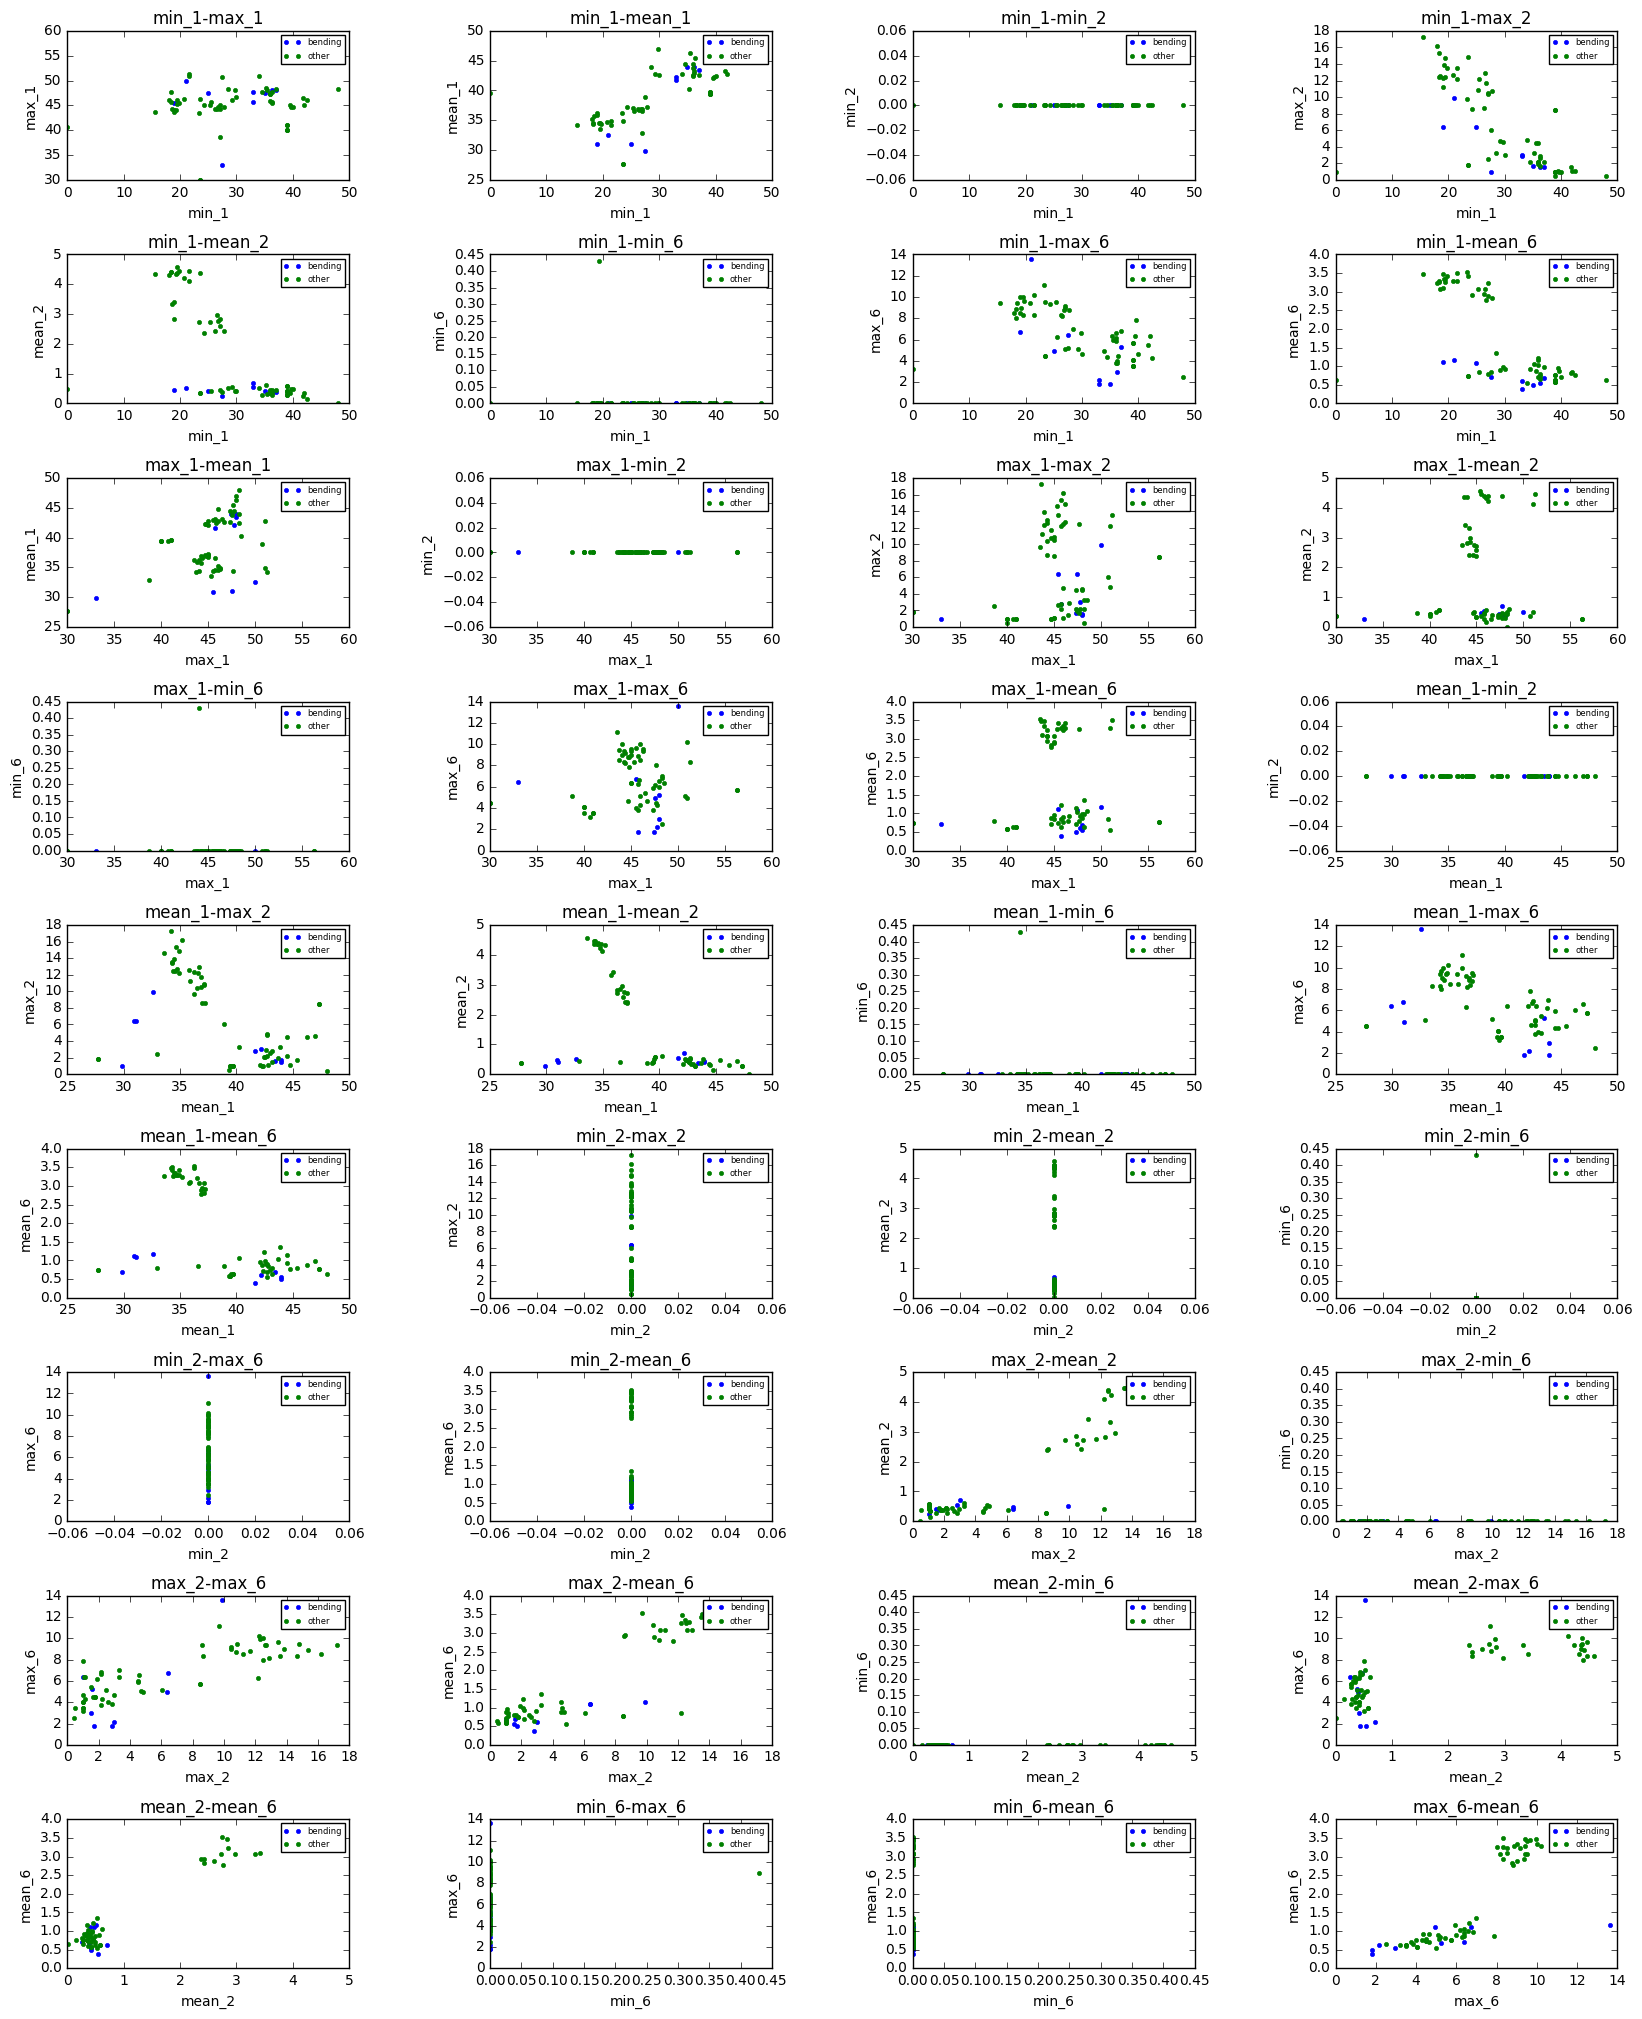

In [8]:
all_list = []
names = ['avg_rss12', 'var_rss12', 'var_rss23']
for training_dataset in training_dataset_list:
    lst = []
    for col in names:
        lst.append(training_dataset[col].min(axis=0))
        lst.append(training_dataset[col].max(axis=0))
        lst.append(training_dataset[col].mean(axis=0))
    all_list.append(lst)

features = pd.DataFrame(all_list)
var_names = []
for i in range(1, 4):
    if i is 3:
        i = 6
    var_names.append('min_' + str(i))
    var_names.append('max_' + str(i))
    var_names.append('mean_' + str(i))
features.columns = var_names
bending_features = features.iloc[:9]
other_features = features.iloc[9:]
index = 1
f, axs = plt.subplots(9,4,figsize=(20,25))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
for i in range(len(var_names)):
    for j in range(i+1, len(var_names)):
        plt.subplot(9, 4, index)
        var1 = var_names[i]
        var2 = var_names[j]
        plt.title(var1 + "-" + var2)
        class0, = plt.plot(bending_features[var1], bending_features[var2], label='bending', marker='.', linestyle='')
        class1, = plt.plot(other_features[var1], other_features[var2], label='other', marker='.', linestyle='')

        plt.legend([class0, class1], ['bending', 'other'],prop={'size': 6})
        plt.xlabel(var1)
        plt.ylabel(var2)
        index += 1

**(ii)**

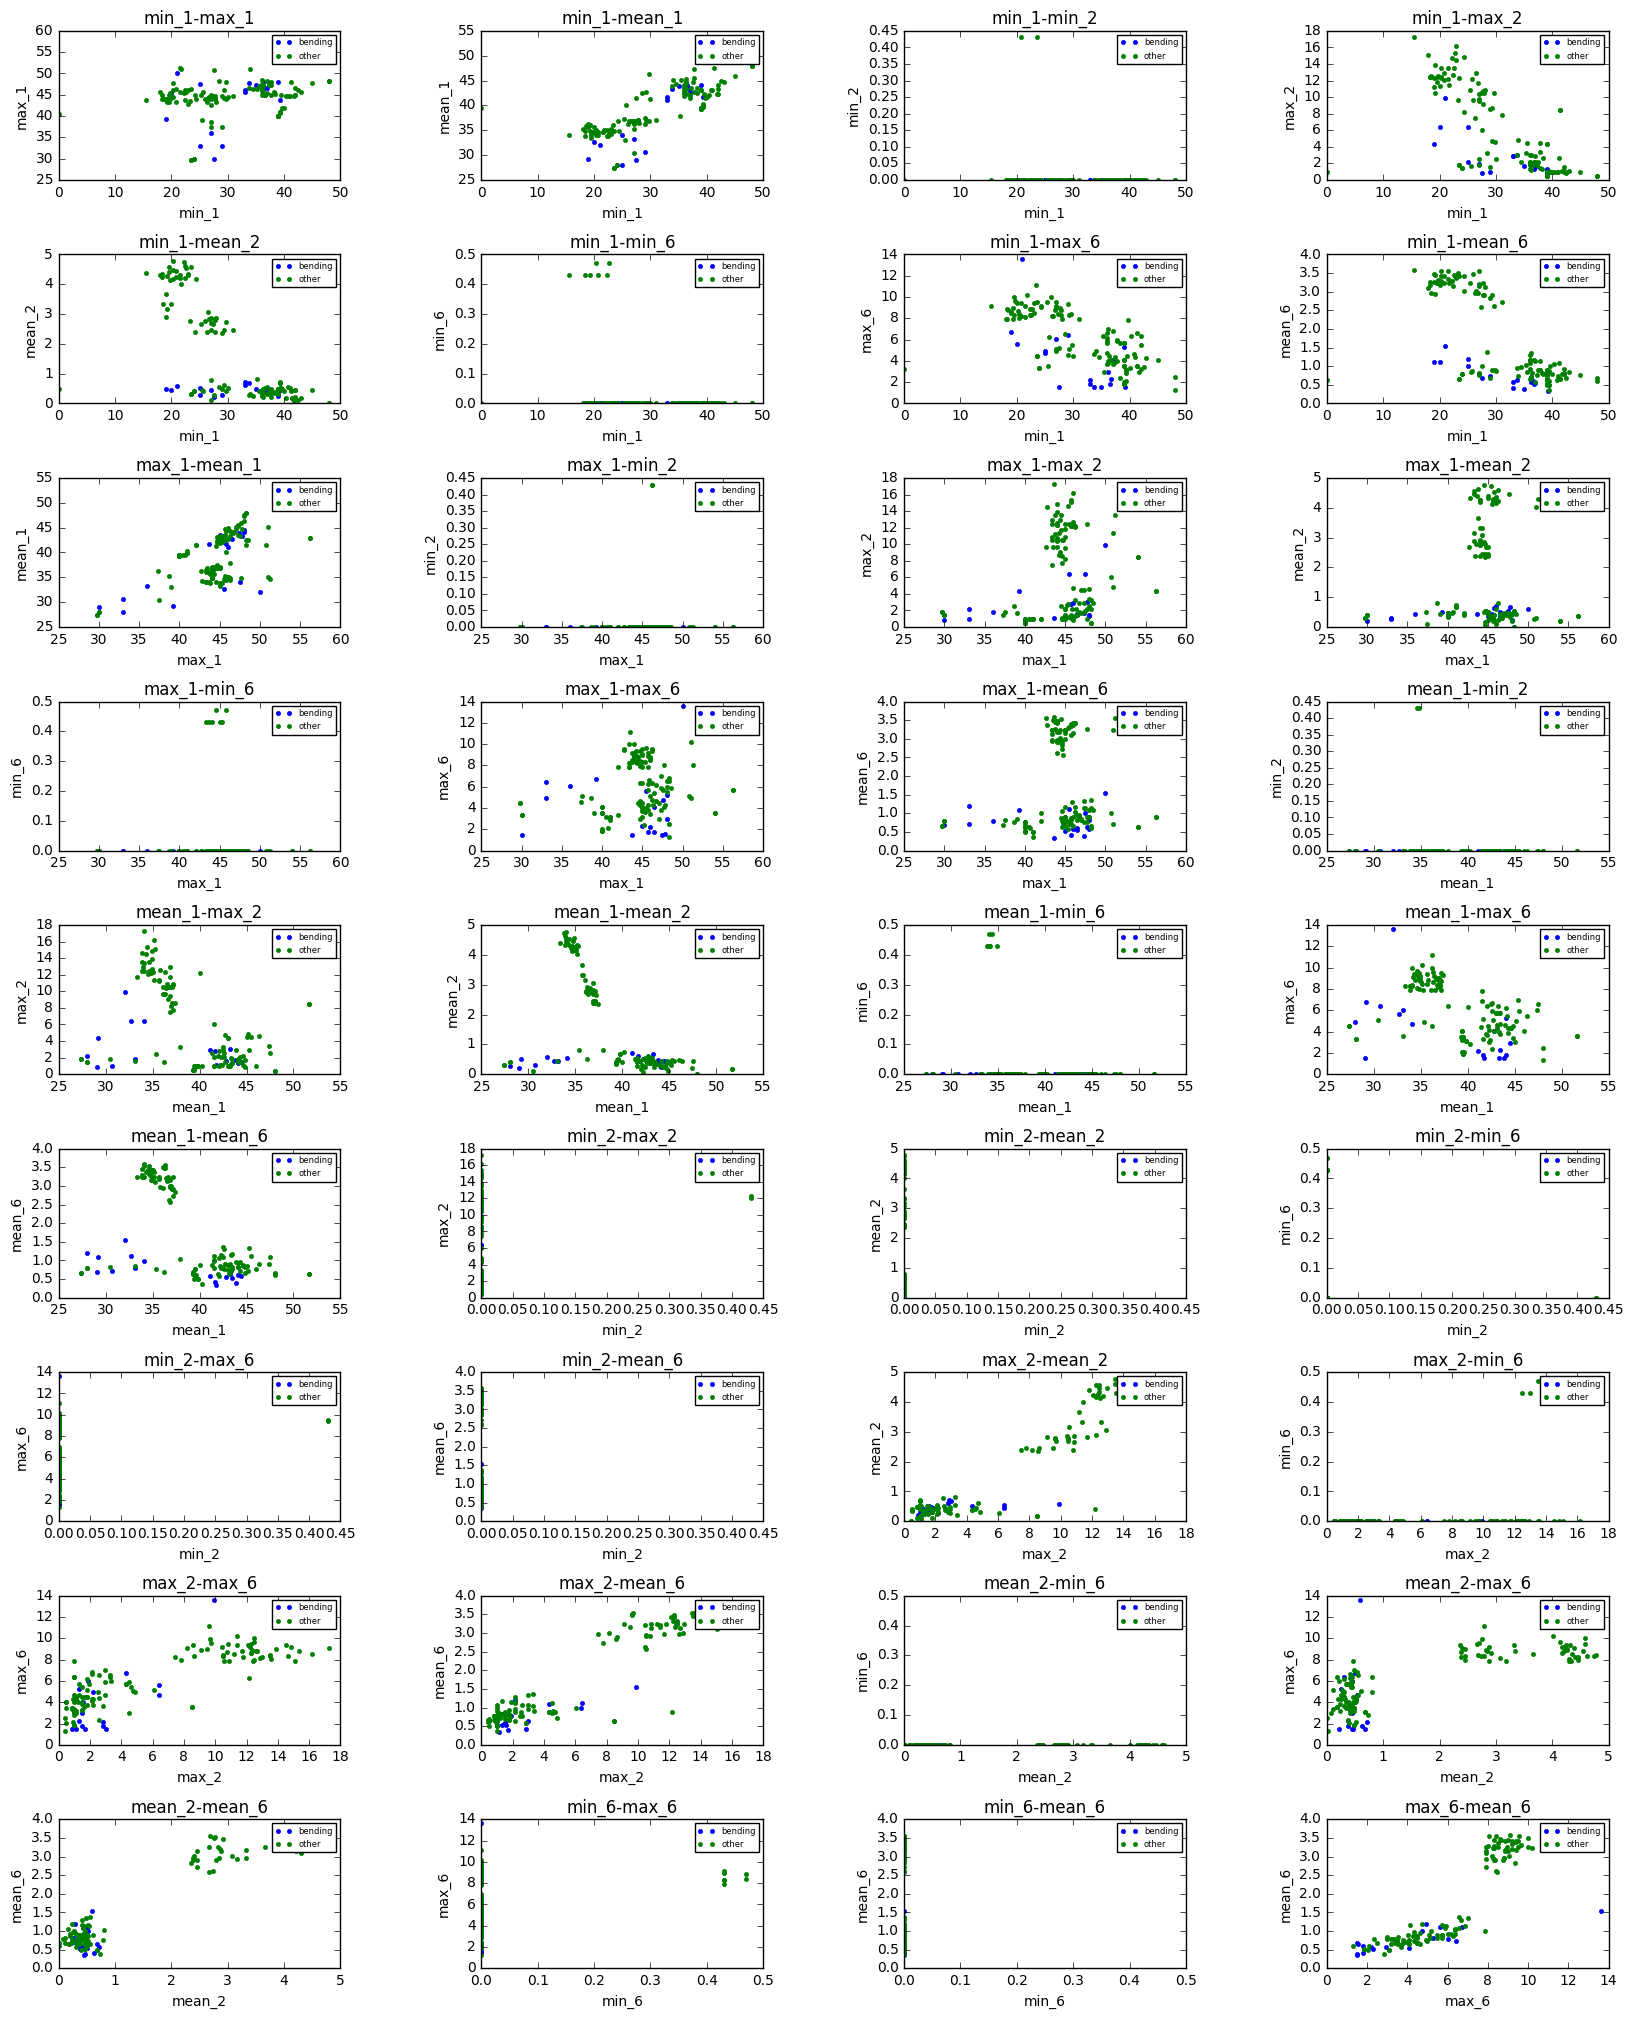

In [9]:
all_list = []
for training_dataset in training_dataset_list:
    lst = []
    lst2 = []
    l = len(training_dataset)
    half = l//2
    first = training_dataset[:half]
    second = training_dataset[half:]
    for col in names:
        lst.append(first[col].min(axis=0))
        lst.append(first[col].max(axis=0))
        lst.append(first[col].mean(axis=0))
        lst2.append(second[col].min(axis=0))
        lst2.append(second[col].max(axis=0))
        lst2.append(second[col].mean(axis=0))
    all_list.append(lst)
    all_list.append(lst2)
features = pd.DataFrame(all_list)
var_names = []
for i in range(1, 4):
    if i is 3:
        i = 6
    var_names.append('min_' + str(i))
    var_names.append('max_' + str(i))
    var_names.append('mean_' + str(i))
features.columns = var_names
bending_features = features.iloc[:18]
other_features = features.iloc[18:]
index = 1
f, axs = plt.subplots(9,4,figsize=(20,25))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
for i in range(len(var_names)):
    for j in range(i+1, len(var_names)):
        plt.subplot(9, 4, index)
        var1 = var_names[i]
        var2 = var_names[j]
        plt.title(var1 + "-" + var2)
        class0, = plt.plot(bending_features[var1], bending_features[var2], label='bending', marker='.', linestyle='')
        class1, = plt.plot(other_features[var1], other_features[var2], label='other', marker='.', linestyle='')

        plt.legend([class0, class1], ['bending', 'other'],prop={'size': 6})
        plt.xlabel(var1)
        plt.ylabel(var2)
        index += 1

The value of each feature changed and some of subplots showed more obvious relationship between two compared features than the subplots in 1(d)i 

***(iii)***

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate

In [11]:
names = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
def trainingSet(L = 1):
    all_list = []
    for training_dataset in training_dataset_list:
        l = len(training_dataset)
        num = l//L
        training_datasets = []
        pre = 0
        for i in range(1,L):
            training_datasets.append(training_dataset[pre:pre+num])
            pre += num
        training_datasets.append(training_dataset[pre:])
        
        for td in training_datasets:
            lst = []
            for col in names:
                lst.append(td[col].min(axis=0))
                lst.append(td[col].max(axis=0))
                lst.append(td[col].mean(axis=0))
                lst.append(td[col].median(axis=0))
                lst.append(td[col].std(axis=0))
                lst.append(td[col].quantile(q=0.25))
                lst.append(td[col].quantile(q=0.75))
            all_list.append(lst)
    features = pd.DataFrame(all_list)
    var_names = []
    for i in range(1, 7):
        var_names.append('min_' + str(i))
        var_names.append('max_' + str(i))
        var_names.append('mean_' + str(i))
        var_names.append('median_' + str(i))
        var_names.append('stdev_' + str(i))
        var_names.append('1st quart_' + str(i))
        var_names.append('3rd quart_' + str(i))
    features.columns = var_names
    bending_features = features.iloc[:9*L]
    other_features = features.iloc[9*L:]
    return bending_features,other_features,features
best_test_score = 0
best_l = 1
best_selector = None
training_data = []
training_target = []
for l in range(1,21):
    bending_features,other_features,features = trainingSet(l)
    model = LogisticRegression()
    d = features.get_values()
    d = np.array(d)
    t = []
    for i in range(0,len(features)):
        if i < len(bending_features):
            t.append(0)
        else:
            t.append(1)
    t = np.array(t)
    selector = RFECV(model, step=1, cv=5)
    selector = selector.fit(d, t)
    score = selector.score(d, t)
    if score > best_test_score:
        best_test_score = score
        best_l = l
        best_selector = selector
        training_data = d
        training_target = t
print('best test score: ',best_test_score)
print('best L: ', best_l)

best test score:  1.0
best L:  1


***(iv)***

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
y_pred = best_selector.predict(training_data)
print("confusion matrix: ")
print(confusion_matrix(training_target, y_pred))

confusion matrix: 
[[ 9  0]
 [ 0 60]]


AUC: 
1.0


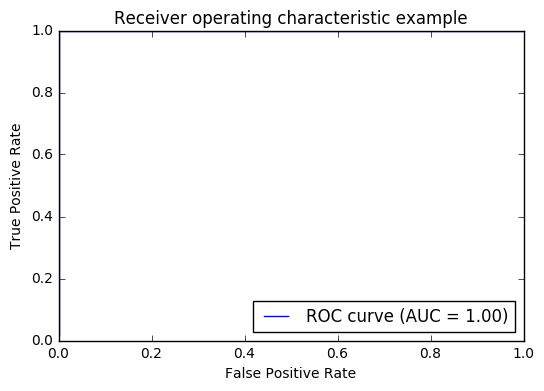

In [14]:
model = LogisticRegression()
model.fit(training_data, training_target)

roc_auc = metrics.roc_auc_score(training_target, model.predict(training_data))
fpr, tpr, thresholds = metrics.roc_curve(training_target, model.predict_proba(training_data)[:,1])
print("AUC: ")
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [15]:
data = pd.DataFrame(training_data)
target = pd.DataFrame(training_target)
results = sm.OLS(target,data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     78.23
Date:                Fri, 29 Jun 2018   Prob (F-statistic):           3.05e-21
Time:                        12:34:22   Log-Likelihood:                 68.734
No. Observations:                  69   AIC:                            -57.47
Df Residuals:                      29   BIC:                             31.90
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0004      0.007     -0.057      0.9

***(v)***

In [16]:
def testSet(L = 1):
    all_list = []
    for test_dataset in test_dataset_list:
        l = len(test_dataset)
        num = l//L
        test_datasets = []
        pre = 0
        for i in range(1,L):
            test_datasets.append(test_dataset[pre:pre+num])
            pre += num
        test_datasets.append(test_dataset[pre:])
        
        for td in test_datasets:
            lst = []
            for col in names:
                lst.append(td[col].min(axis=0))
                lst.append(td[col].max(axis=0))
                lst.append(td[col].mean(axis=0))
                lst.append(td[col].median(axis=0))
                lst.append(td[col].std(axis=0))
                lst.append(td[col].quantile(q=0.25))
                lst.append(td[col].quantile(q=0.75))
            all_list.append(lst)
    features = pd.DataFrame(all_list)
    var_names = []
    for i in range(1, 7):
        var_names.append('min_' + str(i))
        var_names.append('max_' + str(i))
        var_names.append('mean_' + str(i))
        var_names.append('median_' + str(i))
        var_names.append('stdev_' + str(i))
        var_names.append('1st quart_' + str(i))
        var_names.append('3rd quart_' + str(i))
    features.columns = var_names
    bending_features = features.iloc[:4*L]
    other_features = features.iloc[4*L:]
    return bending_features,other_features,features
bending_features, other_features, features = testSet(L=best_l)
y_true = []
for i in range(0, len(features)):
    if i < len(bending_features):
        y_true.append(0)
    else:
        y_true.append(1)
y_true = np.array(y_true)
test_data = features.get_values()
y_pred = best_selector.predict(test_data)
results = []
for i in range(0, len(y_pred)):
    if y_pred[i] == 0:
        results.append("bending")
    else:
        results.append("other activites")
print(y_true)
print(results)
cv_results = cross_validate(best_selector, test_data, y_true, cv=5)
test_cv_result = cv_results['test_score'].mean()
cv_results = cross_validate(best_selector, training_data, training_target, cv=5)
training_cv_result = cv_results['test_score'].mean()
result_show = [[test_cv_result, training_cv_result]]
result_show = pd.DataFrame(result_show)
result_show.columns = ["Test Result Accuracy", "Training Result Accuracy"]
result_show

[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['bending', 'bending', 'bending', 'bending', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites', 'other activites']


,Test Result Accuracy,Training Result Accuracy
0,0.95,0.971429


***(vi)***

In [17]:
model = LogisticRegression()
selector = RFECV(model, step=1, cv=5)
selector = selector.fit(training_data, training_target)
score = selector.score(training_data, training_target)
pre_score = score
changed = False
for i in range(0, 10):
    selector = RFECV(model, step=1, cv=5)
    selector = selector.fit(training_data, training_target)
    score = selector.score(training_data, training_target)
    if pre_score != score:
        print("score changed from ",pre_score," to ",score)
        changed = True
if changed is not True:
    print("The classes does not seem to be well-separated to cause instability in calculating logistic regression parameters")

The classes does not seem to be well-separated to cause instability in calculating logistic regression parameters


***(vii)***

From the confusion matrices, there is imbalanced class (bending).

In [18]:
model = LogisticRegression(class_weight='balanced')
selector = RFECV(model, step=1, cv=5)
selector = selector.fit(training_data, training_target)
score = selector.score(training_data, training_target)
y_pred = best_selector.predict(training_data)
print("confusion matrix: ")
print(confusion_matrix(training_target, y_pred))

confusion matrix: 
[[ 9  0]
 [ 0 60]]


AUC: 
1.0


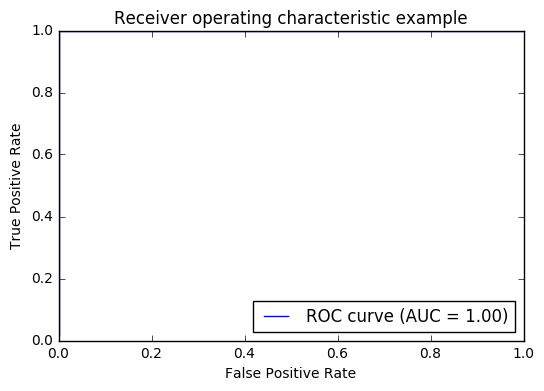

In [19]:
roc_auc = metrics.roc_auc_score(training_target, selector.predict(training_data))
fpr, tpr, thresholds = metrics.roc_curve(training_target, selector.predict_proba(training_data)[:,1])
print("AUC: ")
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### (e)

***(i)***

In [21]:
from sklearn.preprocessing import normalize
from sklearn.linear_model import LassoCV

best_test_score = 0
best_l = 1
best_training_data = []
best_training_target = []
best_selector = None
for l in range(1,21):
    bending_features,other_features,features = trainingSet(l)
#     bending_features,other_features,features = normalize(bending_features), normalize(other_features), normalize(features)
    
    model = LassoCV()
    d = features.get_values()
    d = np.array(d)
    d = normalize(d)
    t = []
    for i in range(0,len(features)):
        if i < len(bending_features):
            t.append(0)
        else:
            t.append(1)
    t = np.array(t)
    selector = RFECV(model, step=1, cv=5)
    selector = selector.fit(d, t)
    score = selector.score(d, t)
    if score > best_test_score:
        best_test_score = score
        best_l = l
        best_training_data = d
        best_training_target = t
        best_selector = selector
print('best test score: ',best_test_score)
print('best L: ', best_l)
best_selector.support_

best test score:  0.0698250516679
best L:  16


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

***(ii)***

In [22]:
data = pd.DataFrame(best_training_data)
target = pd.DataFrame(best_training_target)
results = sm.OLS(target,data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     388.3
Date:                Fri, 29 Jun 2018   Prob (F-statistic):               0.00
Time:                        12:50:09   Log-Likelihood:                 53.284
No. Observations:                1104   AIC:                            -22.57
Df Residuals:                    1062   BIC:                             187.7
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.6413      0.770      0.833      0.4

### (f)

***(i)***

In [40]:
def multiClassTrainingSet(L = 1):
    all_list = []
    for training_dataset in training_dataset_list:
        l = len(training_dataset)
        num = l//L
        training_datasets = []
        pre = 0
        for i in range(1,L):
            training_datasets.append(training_dataset[pre:pre+num])
            pre += num
        training_datasets.append(training_dataset[pre:])
        
        for td in training_datasets:
            lst = []
            for col in names:
                lst.append(td[col].min(axis=0))
                lst.append(td[col].max(axis=0))
                lst.append(td[col].mean(axis=0))
                lst.append(td[col].median(axis=0))
                lst.append(td[col].std(axis=0))
                lst.append(td[col].quantile(q=0.25))
                lst.append(td[col].quantile(q=0.75))
            all_list.append(lst)
    features = pd.DataFrame(all_list)
    var_names = []
    for i in range(1, 7):
        var_names.append('min_' + str(i))
        var_names.append('max_' + str(i))
        var_names.append('mean_' + str(i))
        var_names.append('median_' + str(i))
        var_names.append('stdev_' + str(i))
        var_names.append('1st quart_' + str(i))
        var_names.append('3rd quart_' + str(i))
    features.columns = var_names
    bending1_features = features.iloc[:5*L]
    bending2_features = features.iloc[5*L:9*L]
    cycling_features = features.iloc[9*L:21*L]
    lying_features = features.iloc[21*L:33*L]
    sitting_features = features.iloc[33*L:45*L]
    standing_features = features.iloc[45*L:57*L]
    walking_features = features.iloc[57*L:]
    feature_list = []
    feature_list.append(bending1_features)
    feature_list.append(bending2_features)
    feature_list.append(cycling_features)
    feature_list.append(lying_features)
    feature_list.append(sitting_features)
    feature_list.append(standing_features)
    feature_list.append(walking_features)
    return feature_list,features

In [42]:
from sklearn.preprocessing import normalize
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

mapping = {0:"bending1",1:"bending2", 2:"cycling", 3:"lying", 4:"sitting", 5:"standing", 6:"walking"}
best_test_score = 0
best_l = 1
best_training_data = []
best_training_target = []
best_selector = None
    
for l in range(5,7):
    feature_list,features = multiClassTrainingSet(l)
#     bending_features,other_features,features = normalize(bending_features), normalize(other_features), normalize(features)
    print("start loop ",l)
    model = LassoCV()
    d = features.get_values()
    d = np.array(d)
    d = normalize(d)
    t = [0]*len(features)
    end = len(feature_list[0])
    for i in range(1, len(feature_list)):
        start = end
        end = start + len(feature_list[i])
        t[start:end] = [i] * (len(feature_list[i]))
    t = np.array(t)
    print(t)
    selector = RFECV(model, step=1, cv=5)
    selector = selector.fit(d, t)
    score = selector.score(d, t)
    if score > best_test_score:
        best_test_score = score
        best_l = l
        best_training_data = d
        best_training_target = t
        best_selector = selector
best_test_score

start loop  5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6]
start loop  6
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3

0

In [39]:
error = 1 - best_test_score
print("error rate: ",error)
y_pred = best_selector.predict(best_training_data)
# print("confusion matrix: ")
# print(confusion_matrix(best_training_target, y_pred, labels=[0,1,2,3,4,5]))
print(best_training_target)
print(y_pred)

error rate:  0.948323577074
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5

## Question 2

(a) We can expect the cubic regression model to have a lower training RSS than the linear regression model since the cubic regression could make a tighter fit against data that matched with a wider irreducible error.
(b) Using test data, we still can expect the linear regression model to have a lower test RSS than cubic regression model since the cubic regression is overfit from the training. So, the cubic regression have more error than the linear regression.
(c) I think the cubic regression has lower training RSS than the linear regression since the cubic regression model has a higher flexibility. No matter what the underlying true relationship is the more flexible model will have closer follow points and reduce training RSS.
(d) If it is test RSS, there is not enough information to tell about this question. If it is closer to linear than cubic, the linear regression test RSS can be lower than the cubic regression test RSS, if it is closer to cubic regression than linear regression, the cubic regression test RSS can be lower than the linear regression test RSS because it is dues to bias-variance tradeoff. 

## Question 3